## Exploratory data analysis
#### Pablo Gonzalez B.

### Variable Description

`GRCODE NAIC` company code (including insurer groups and single insurers)

`GRNAME NAIC` company name (including insurer groups and single insurers)

`AccidentYear` Accident year(1988 to 1997)

`DevelopmentYear` Development year (1988 to 1997)

`DevelopmentLag` Development year (AY-1987 + DY-1987 - 1)

`IncurLoss_` Incurred losses and allocated expenses reported at year end

`CumPaidLoss_` Cumulative paid losses and allocated expenses at year end

`BulkLoss_` Bulk and IBNR reserves on net losses and defense and cost containment expenses reported at year end

`PostedReserve97_` Posted reserves in year 1997 taken from the Underwriting and Investment Exhibit – Part 2A, including net losses unpaid and unpaid loss adjustment expenses

`EarnedPremDIR_` Premiums earned at incurral year - direct and assumed

`EarnedPremCeded_` Premiums earned at incurral year - ceded

`EarnedPremNet_` Premiums earned at incurral year - net

`Single` 1 indicates a single entity, 0 indicates a group insurer

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [2]:
data = pd.read_csv('medmal_pos.csv')
data.shape

(3400, 13)

### Descriptive statistics, dtypes and non-null count

In [3]:
data.describe()

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,22809.764706,1992.500000,1997.000000,5.500000,11609.344412,6706.067059,1095.803235,14111.605882,1803.497059,12308.108824,0.852941,57065.529412
std,14708.377001,2.872704,4.062617,2.872704,26802.819463,17121.815066,7612.672277,26399.284476,3893.424584,24824.225795,0.354217,134355.533990
min,669.000000,1988.000000,1988.000000,1.000000,-17.000000,-1190.000000,-32101.000000,-781.000000,-6214.000000,-728.000000,0.000000,0.000000
25%,10341.000000,1990.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,629.000000
50%,19764.000000,1992.500000,1997.000000,5.500000,645.000000,187.000000,0.000000,1500.000000,106.500000,1302.000000,1.000000,5875.000000
75%,36234.000000,1995.000000,2000.000000,8.000000,9050.500000,4385.500000,107.250000,18094.500000,1473.500000,13490.000000,1.000000,46762.000000
max,44504.000000,1997.000000,2006.000000,10.000000,179425.000000,113189.000000,104402.000000,131948.000000,25553.000000,135318.000000,1.000000,702246.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              3400 non-null   int64 
 1   GRNAME              3400 non-null   object
 2   AccidentYear        3400 non-null   int64 
 3   DevelopmentYear     3400 non-null   int64 
 4   DevelopmentLag      3400 non-null   int64 
 5   IncurLoss_F2        3400 non-null   int64 
 6   CumPaidLoss_F2      3400 non-null   int64 
 7   BulkLoss_F2         3400 non-null   int64 
 8   EarnedPremDIR_F2    3400 non-null   int64 
 9   EarnedPremCeded_F2  3400 non-null   int64 
 10  EarnedPremNet_F2    3400 non-null   int64 
 11  Single              3400 non-null   int64 
 12  PostedReserve97_F2  3400 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 345.4+ KB


In [5]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numeric_features = data.select_dtypes(include=['object']).columns.tolist()

print(f'Numeric columns: {len(numeric_features)}, Non-numeric columns: {len(non_numeric_features)}')

Numeric columns: 12, Non-numeric columns: 1


In [6]:
data[non_numeric_features[0]].unique()

array(['Scpie Indemnity Co', 'Promutual Grp', 'Great Amer Grp',
       'Nationwide Grp', 'Markel Corp Grp',
       'Overseas Partners Us Reins Co', 'Eastern Dentists Ins Co RRG',
       'American Assoc Of Othodontists RRG',
       'Controlled Risk Ins Co Of VT Inc', 'Texas Medical Ins Co',
       'MCIC VT Inc RRG', 'Franklin Cas Ins Co RRG', 'Homestead Ins Co',
       'Campmed Cas & Ind Co Inc MD', 'Community Blood Cntr Exch RRG',
       'Underwriters At Lloyds London', 'NCMIC Ins Co',
       'National American Ins Co', 'Michigan Professional Ins Exch',
       'Nichido Fire & Marine Ins Co Ltd', 'Texas Hospital Ins Exch',
       'State Volunteer Mut Ins Co', 'MHA Ins Co', 'Health Care Ind Inc',
       'National Guardian RRG Inc', 'Preferred Professional Ins Co',
       'Medical Mut Ins Co Of ME', 'Utah Medical Ins Assoc',
       'Seguros Triples Inc', 'Dentists Ins Co',
       'Physicians Recip Insurers', 'Louisiana Med Mut Ins Co',
       'Clinic Mut Ins Co RRG', 'California Healthcar

### Outliers analysis and distribution of numerical features

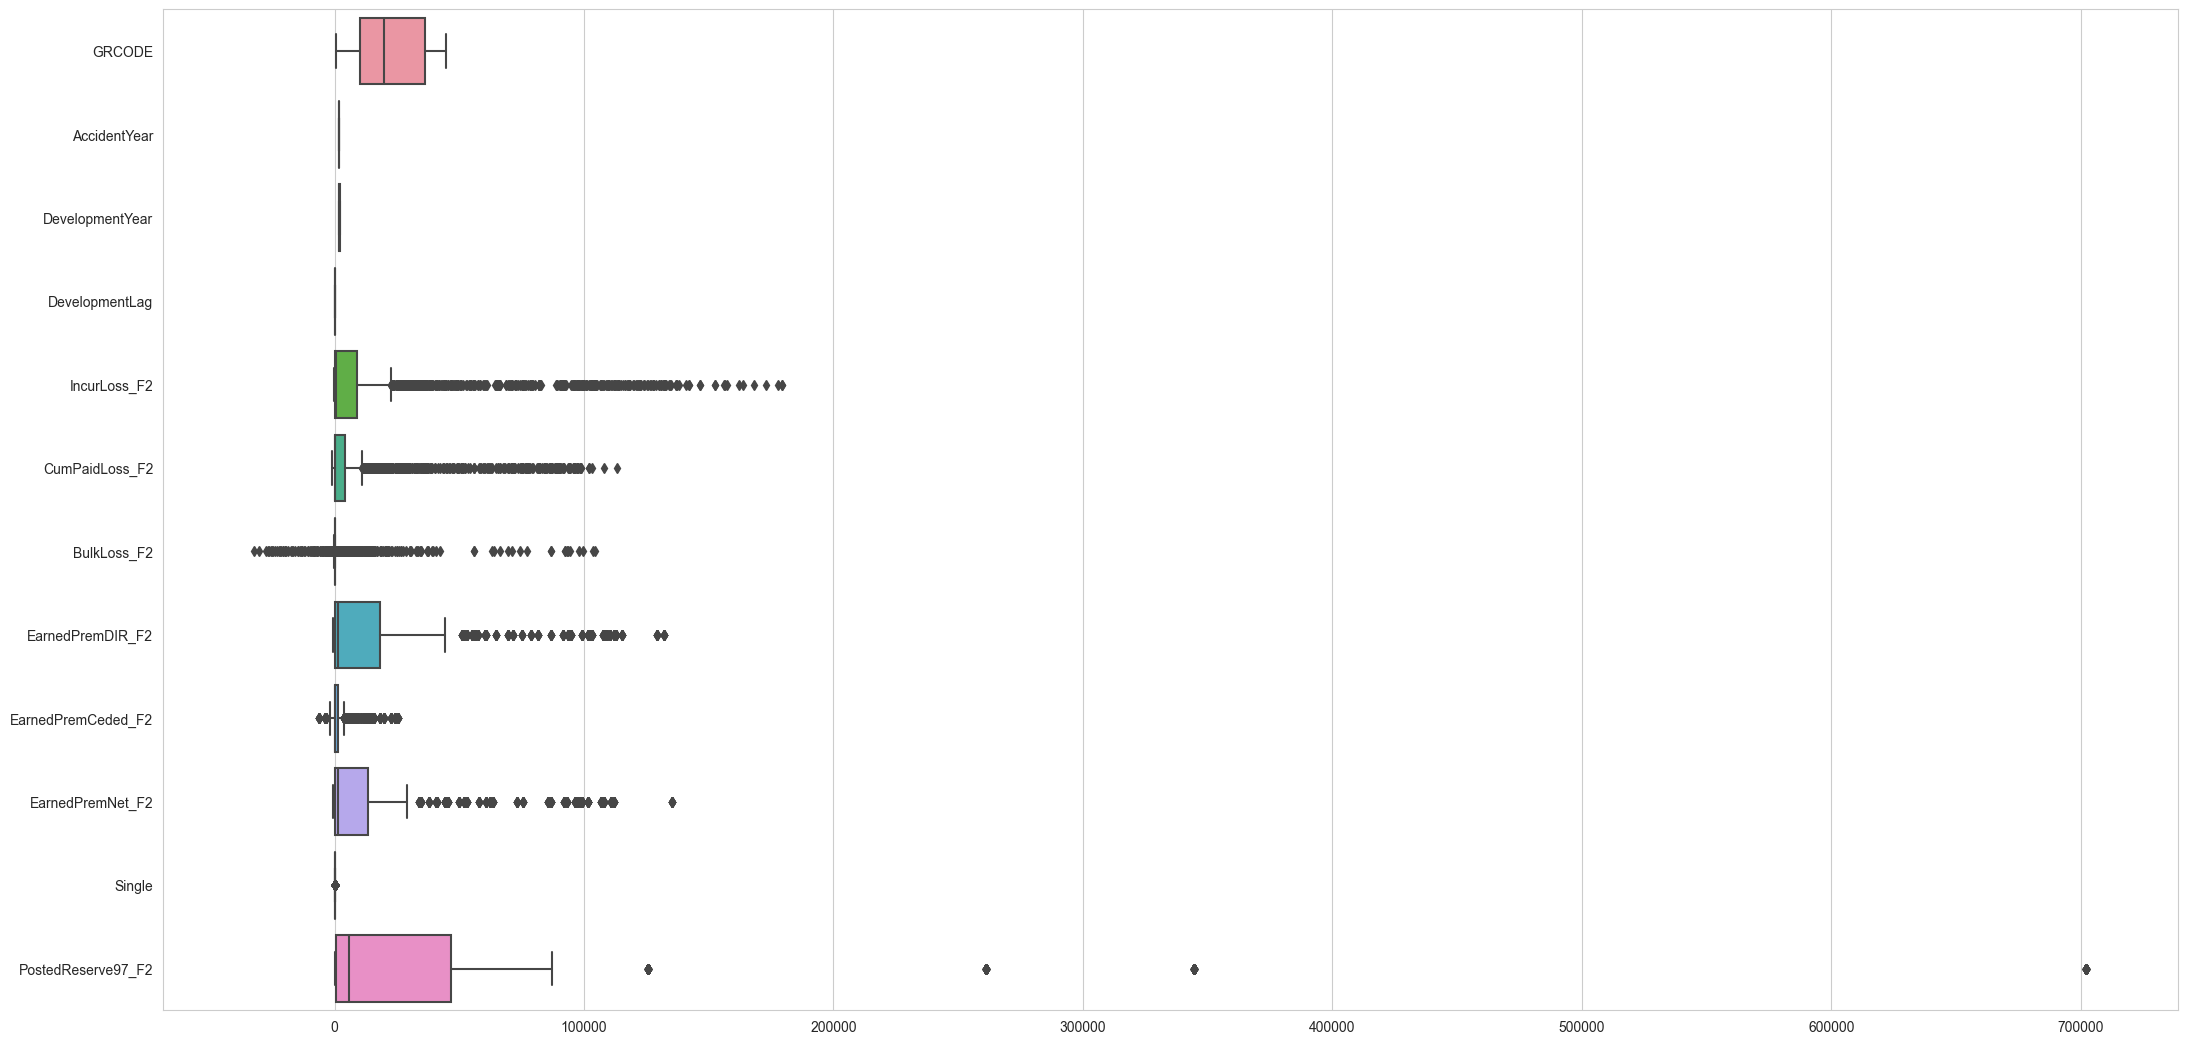

In [7]:
plt.rcParams['figure.figsize'] = (26, 13)
sns.boxplot(data[numeric_features], orient="h");

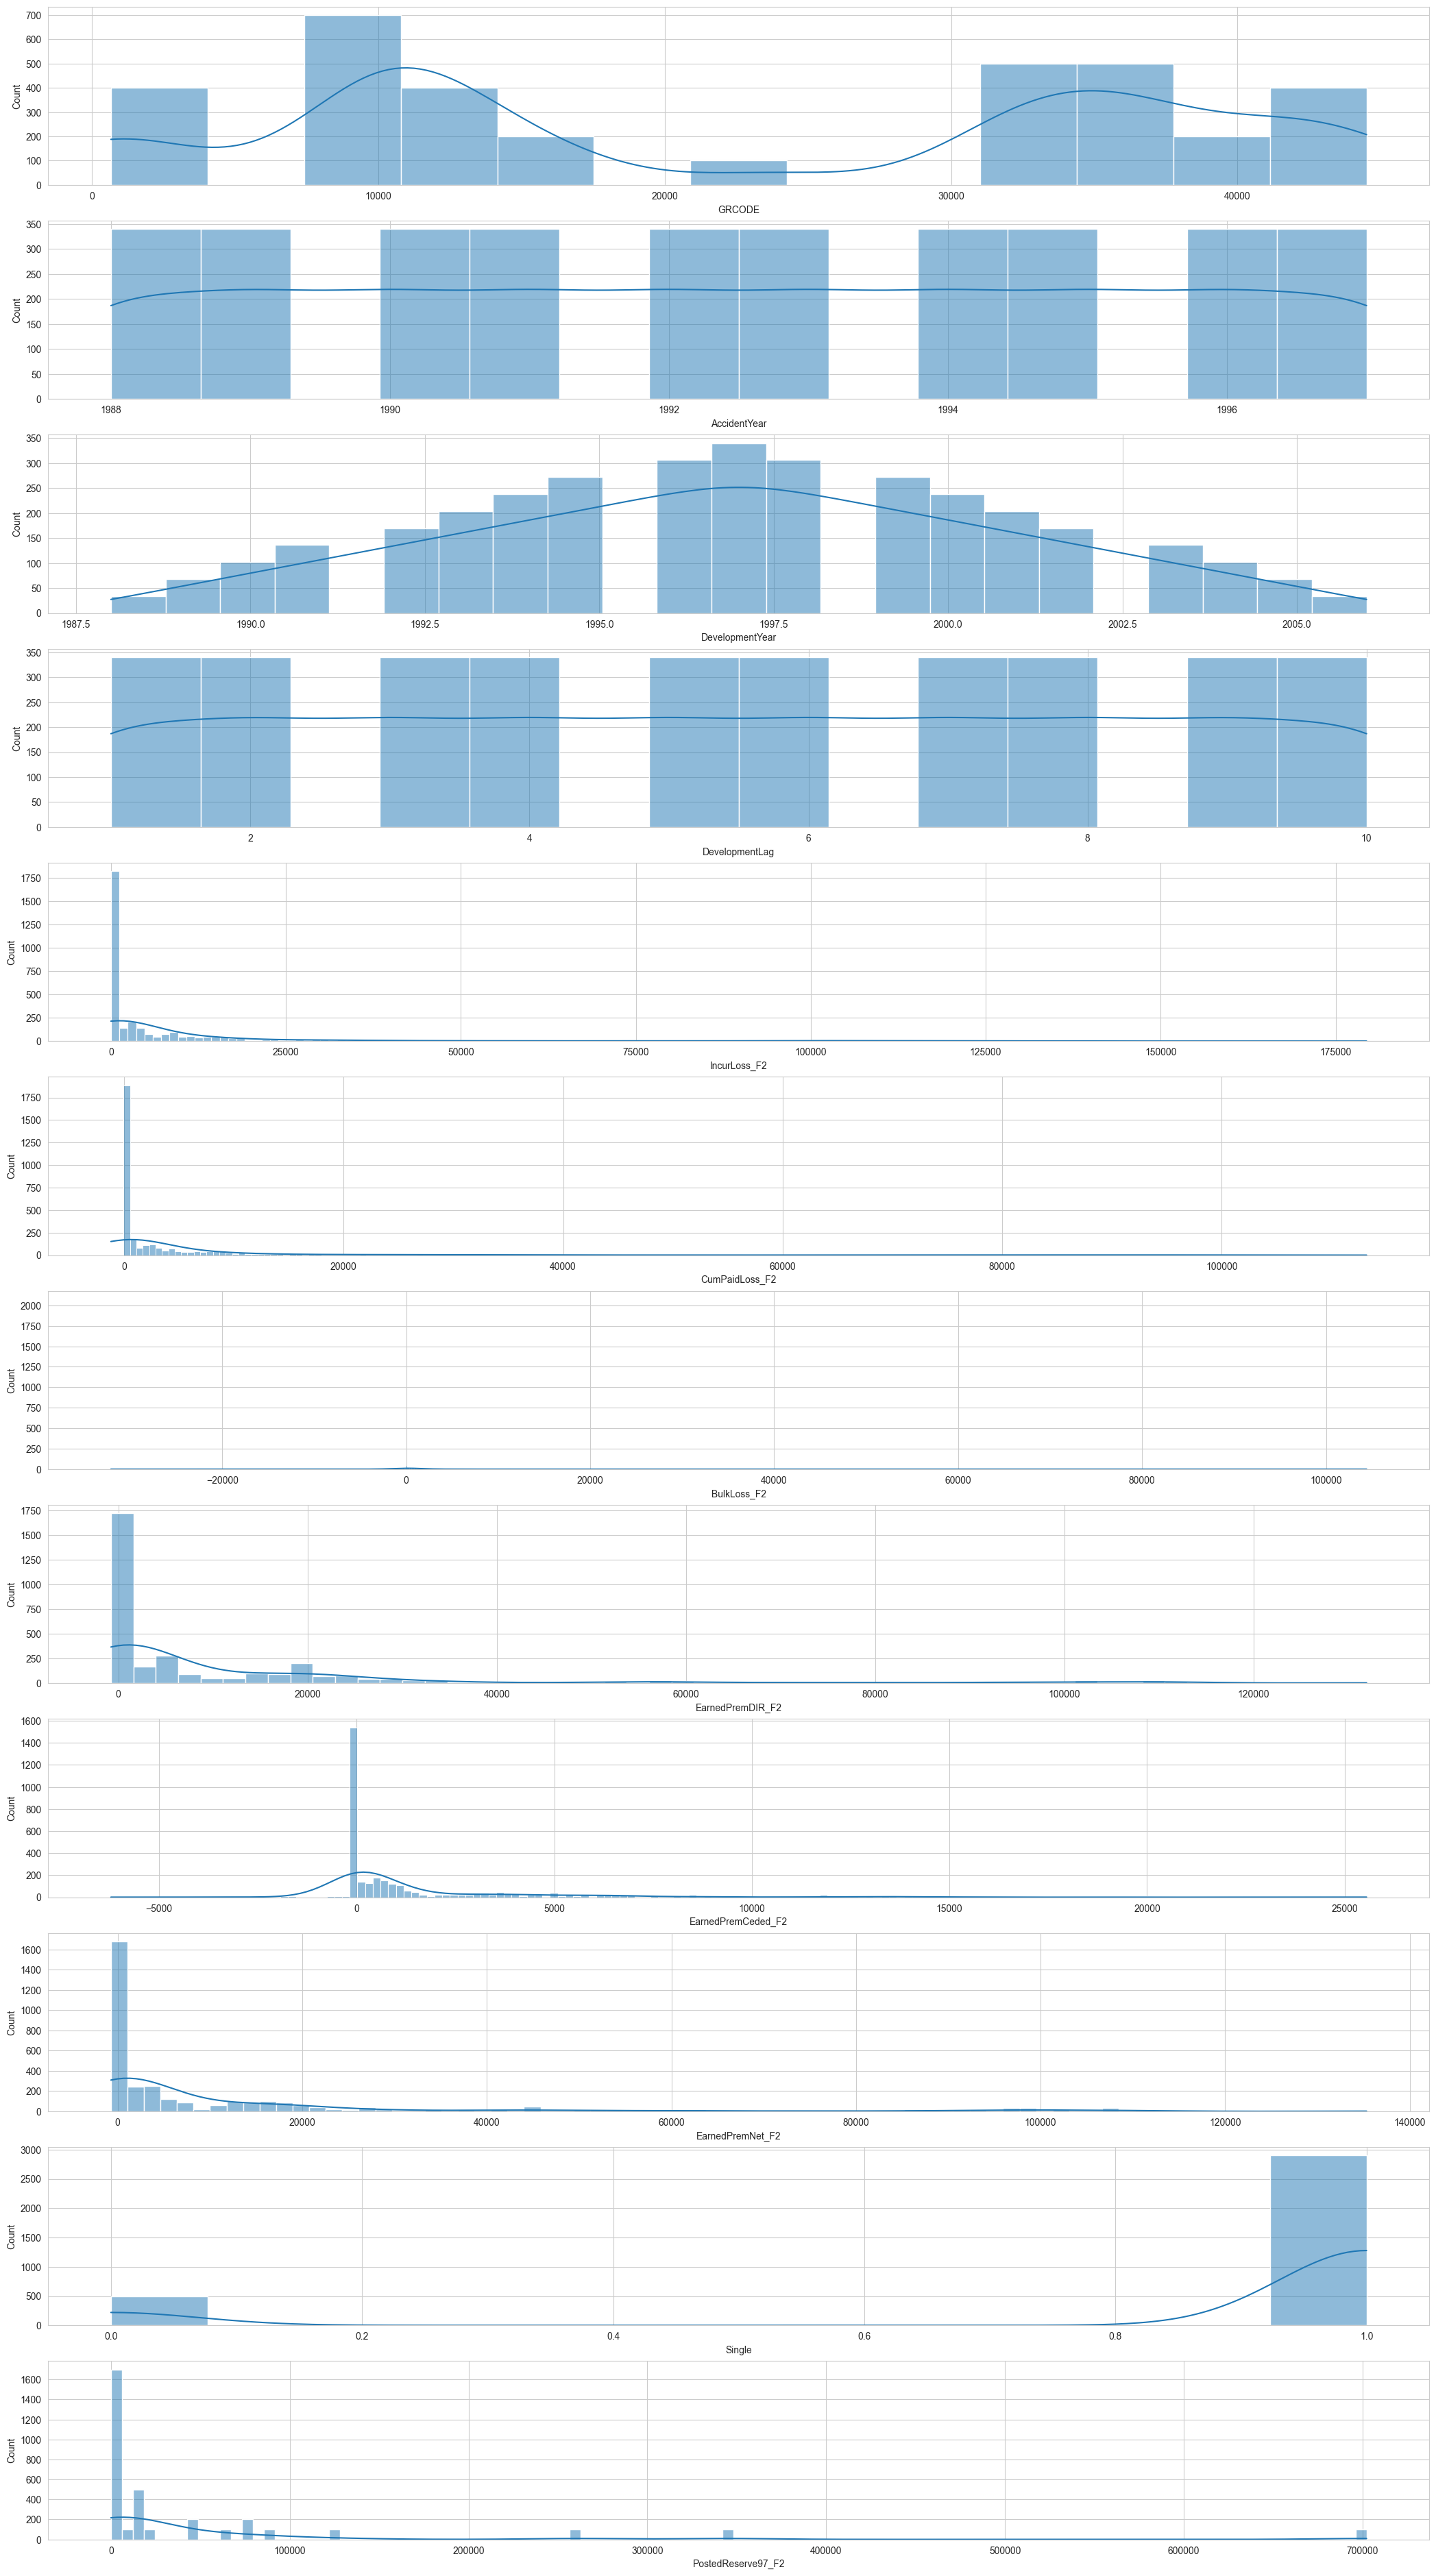

In [8]:
plt.rcParams['figure.figsize'] = (26, 4 * len(numeric_features))
fig, axes = plt.subplots(len(numeric_features), 1)

for i in range(len(axes)):
    sns.histplot(data=data, x=numeric_features[i], kde=True, legend=True, ax=axes[i])
plt.show();

### Correlations between numerical features

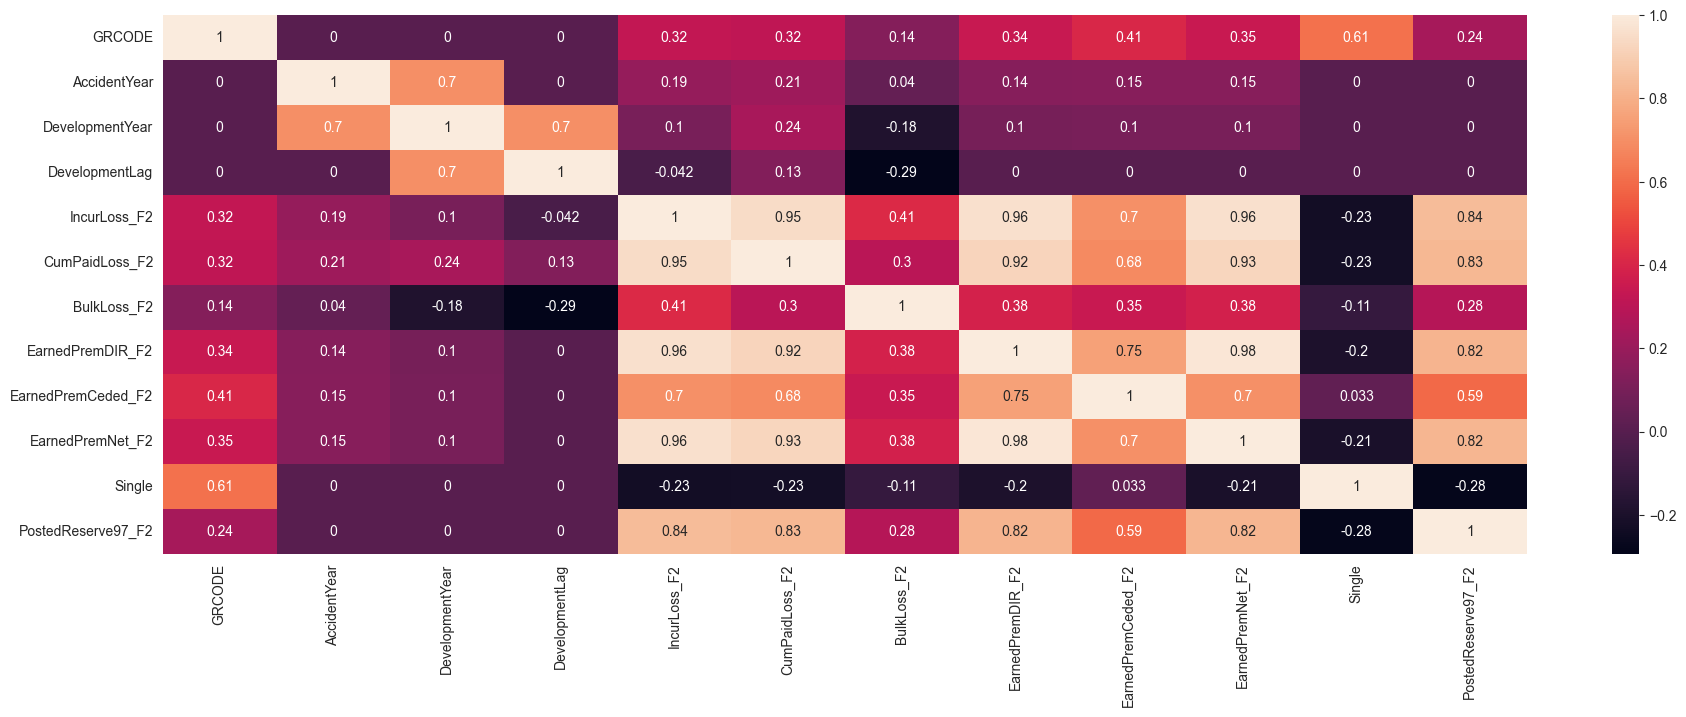

In [13]:
plt.rcParams['figure.figsize'] = (22, 7)
sns.heatmap(data[numeric_features].corr(method='spearman'), annot=True);

### Scatterplot of relevant correlations grouped by `AccidentYear`

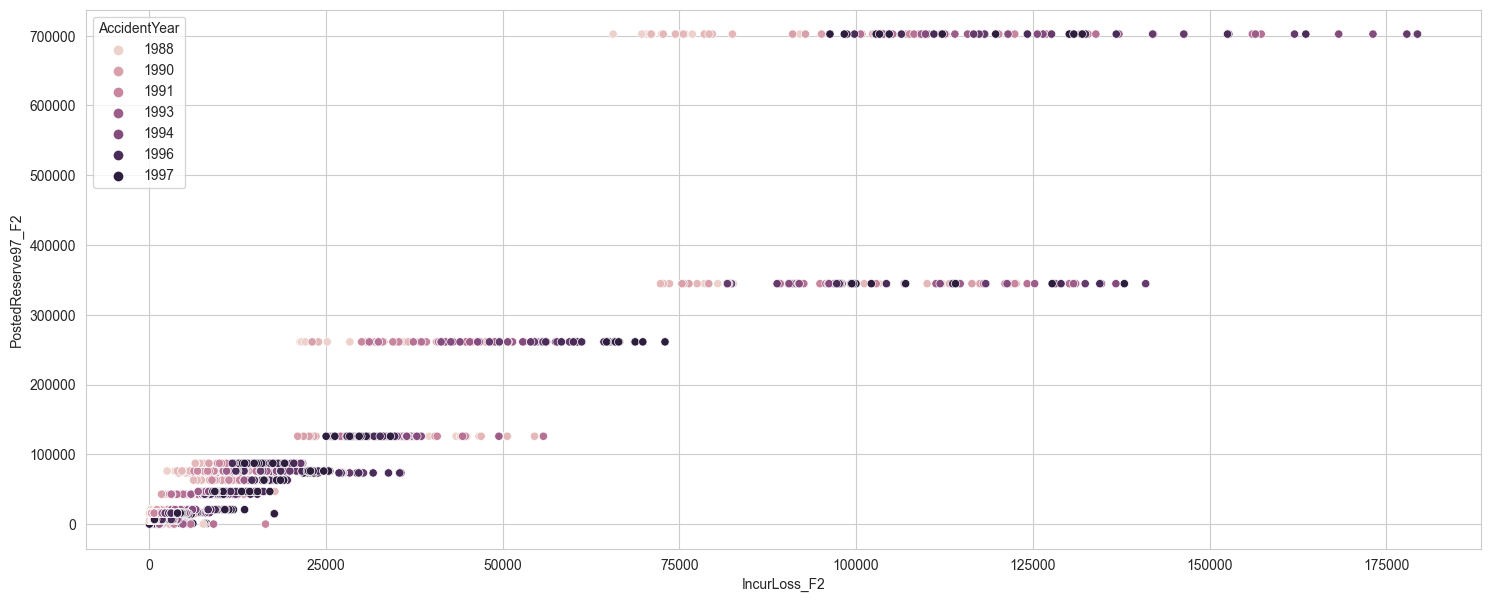

In [10]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.scatterplot(data=data, x='IncurLoss_F2', y='PostedReserve97_F2', hue='AccidentYear');

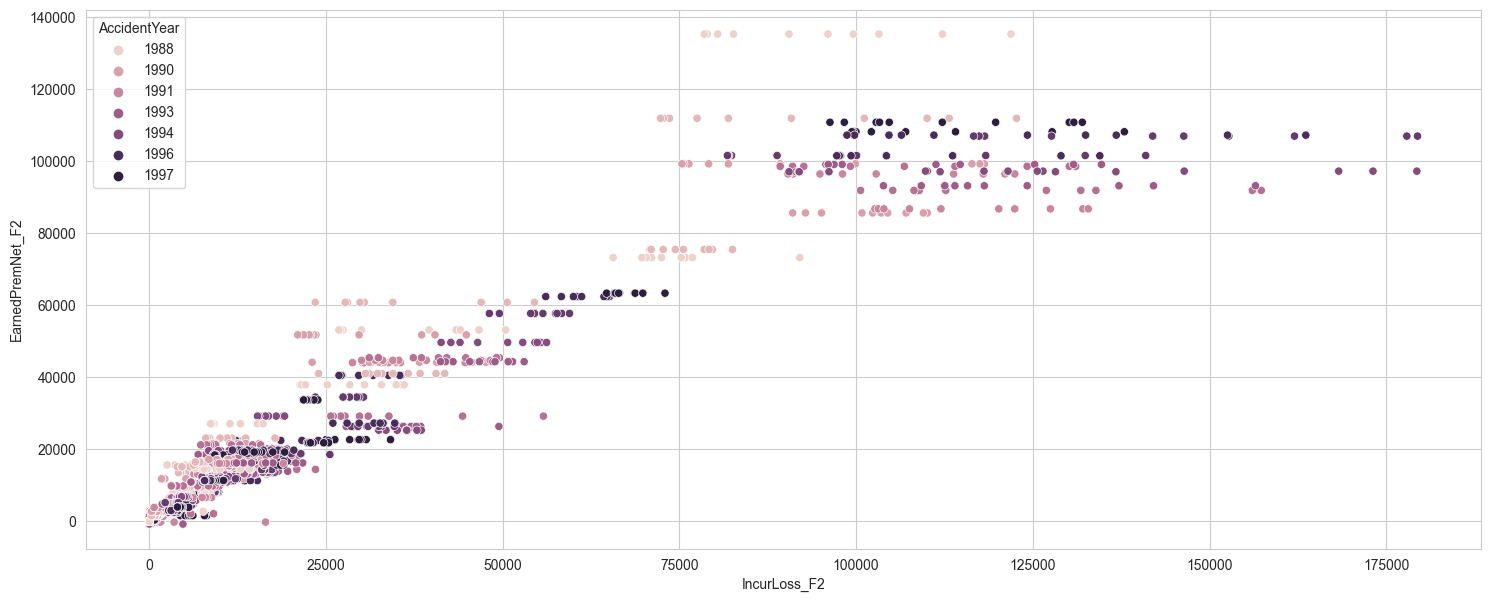

In [11]:
sns.scatterplot(data=data, x='IncurLoss_F2', y='EarnedPremNet_F2', hue='AccidentYear');

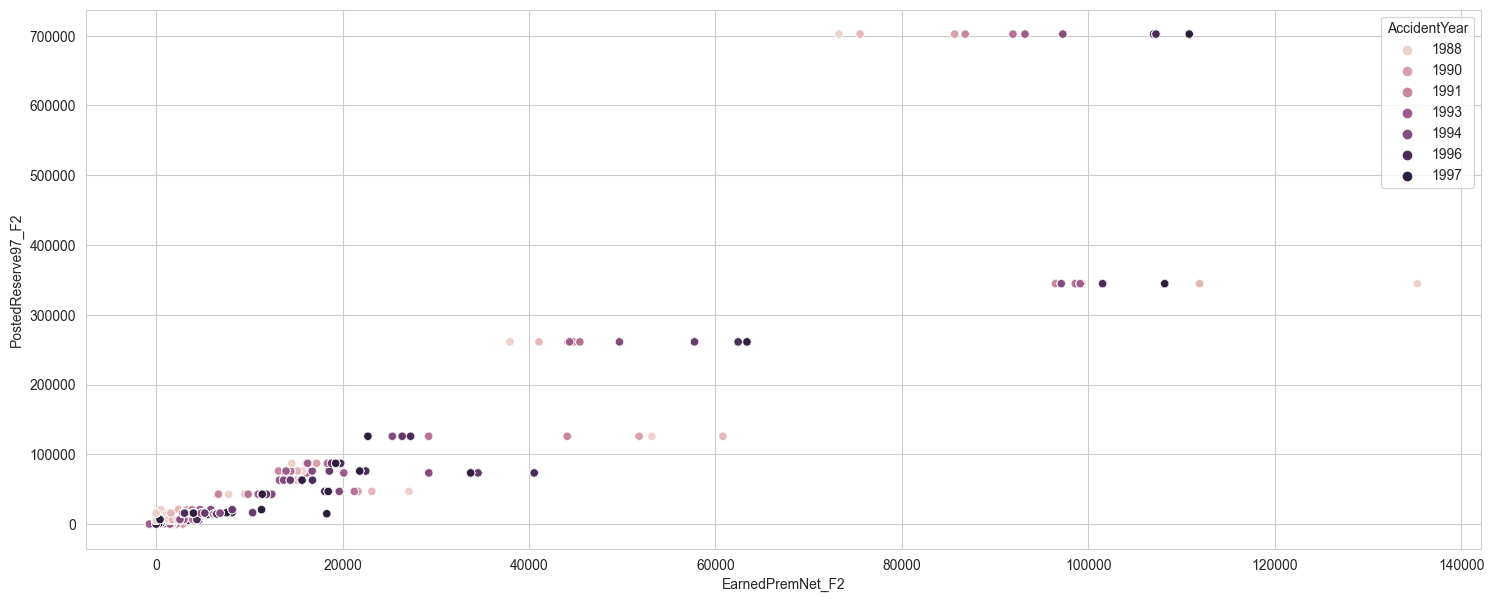

In [12]:
sns.scatterplot(data=data, x='EarnedPremNet_F2', y='PostedReserve97_F2', hue='AccidentYear');